In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA


In [3]:
file_path = '/Users/vijay/Desktop/vijay/221801505/221801505/yahoo_data.xlsx'
data = pd.read_excel(file_path)

In [4]:
data['Date'] = pd.to_datetime(data['Date']) 
data = data.sort_values(by='Date')

In [5]:
def plot_line_chart(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Date'], data['Close*'], label='Close Price', color='blue') 
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Stock Price Line Chart')
    plt.grid(True)
    plt.legend() 
    plt.show()


In [6]:
def plot_candlestick_chart(data): 
  fig = go.Figure(data=[
     go.Candlestick(
       x=data['Date'], open=data['Open'], high=data['High'], low=data['Low'], close=data['Close*'], increasing_line_color='green',decreasing_line_color='red'
     )
  ])
  fig.update_layout(
  title='Candlestick Chart',
  xaxis_title='Date',
  yaxis_title='Price',
  xaxis_rangeslider_visible=False
  )
  fig.show()



In [7]:
def regression_analysis(data):
  data['Date_ordinal'] = data['Date'].apply(lambda x: x.toordinal())
  X = data[['Date_ordinal']]
  y = data['Close*']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
  model = LinearRegression()
  model.fit(X_train, y_train) 
  y_pred = model.predict(X_test) 
  plt.figure(figsize=(12, 6))
  plt.scatter(X_test, y_test, color='blue', label='Actual')
  plt.plot(X_test, y_pred, color='red', label='Predicted')
  plt.xlabel('Date')
  plt.ylabel('Price')
  plt.title('Regression Analysis')
  plt.legend()
  plt.show()
  print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
  print('R-squared:', r2_score(y_test, y_pred))


In [9]:
def time_series_analysis(data):
  data.set_index('Date', inplace=True)
  close_prices = data['Close*']
  model = ARIMA(close_prices, order=(5, 1, 0))
  model_fit = model.fit()
  print(model_fit.summary())
  close_prices.plot(label='Original', figsize=(12, 6))
  model_fit.fittedvalues.plot(label='Fitted', color='red')
  plt.title('ARIMA Time Series Analysis') 
  plt.legend()
  plt.show()


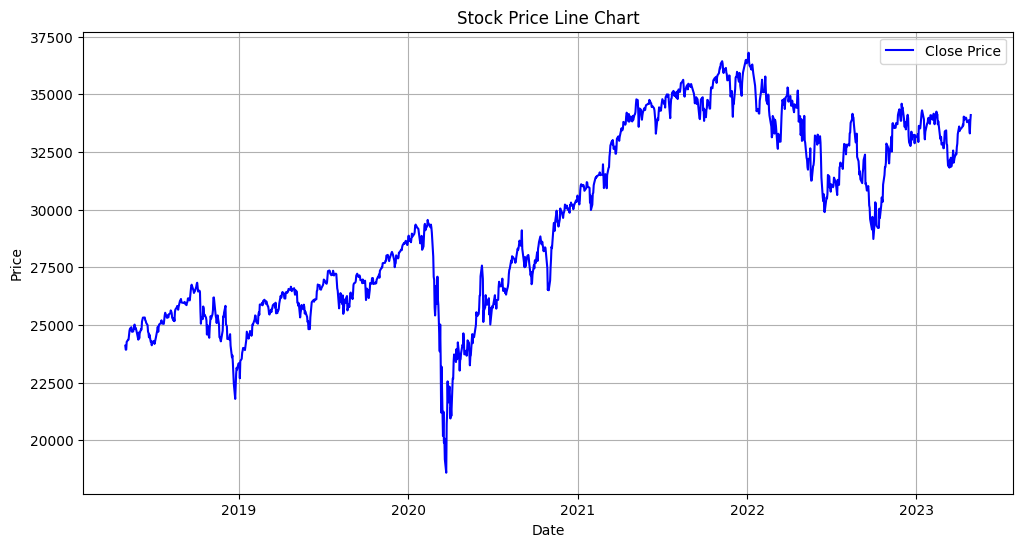

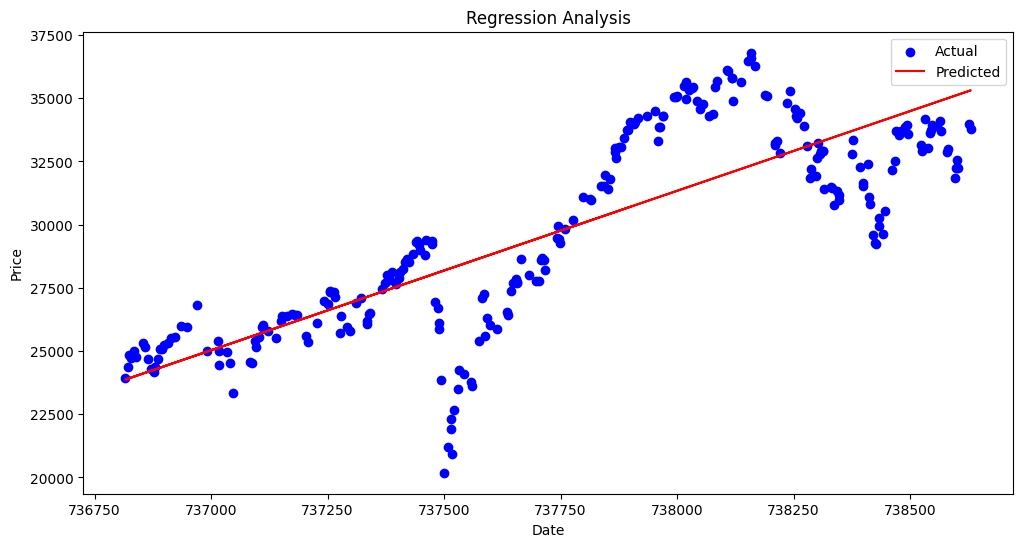

Mean Squared Error: 5512690.80338975
R-squared: 0.6460197199997386


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                               SARIMAX Results                                
Dep. Variable:                 Close*   No. Observations:                 1258
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -9159.851
Date:                Fri, 20 Sep 2024   AIC                          18331.702
Time:                        21:01:37   BIC                          18362.521
Sample:                             0   HQIC                         18343.285
                               - 1258                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1088      0.015     -7.110      0.000      -0.139      -0.079
ar.L2          0.1059      0.014      7.364      0.000       0.078       0.134
ar.L3         -0.0101      0.017     -0.612      0.5

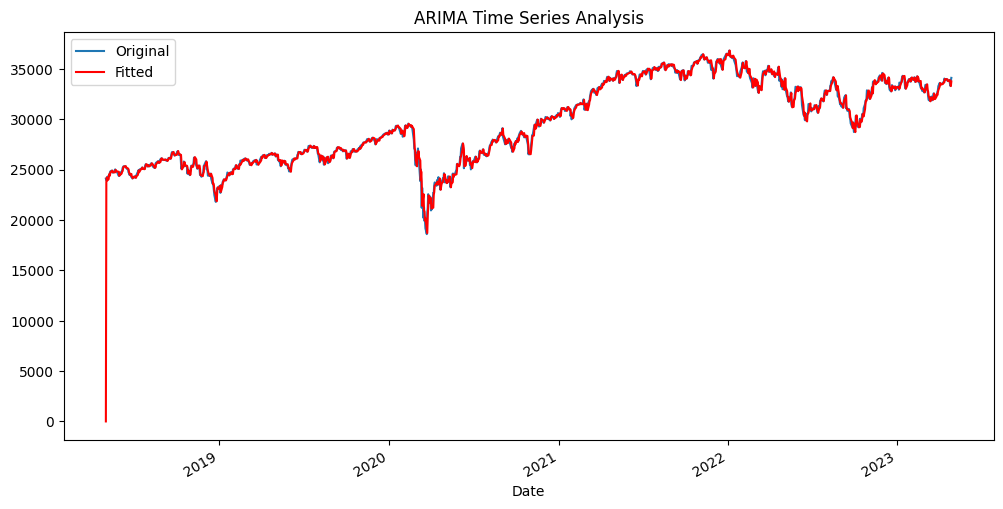

In [10]:
if __name__ == '__main__':
    plot_line_chart(data)
    plot_candlestick_chart(data)
    regression_analysis(data)
    time_series_analysis(data)
